# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Kevin Glory Prasetyo
- **Email:** 71220958@students.ukdw.ac.id
- **ID Dicoding:** vinprsetyo

## Menentukan Pertanyaan Bisnis

- Bagaimana perbedaan intensitas penyewaan sepeda oleh pengguna casual dan registered di bawah kecepatan angin (windspeed) yang berbeda?
- Apakah terdapat variasi penyewaan sepeda berdasarkan suhu (temp), dan bagaimana perbandingan penggunaan sepeda oleh pengguna casual dan registered di berbagai tingkat suhu?




## Import Semua Packages/Library yang Digunakan

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [9]:
# Mengload table data hari dan table data jam
hari = "https://raw.githubusercontent.com/Kevin-Glory-Prasetyo/Projek-Data-Analisis-Dicoding/refs/heads/main/day.csv"
jam  = "https://raw.githubusercontent.com/Kevin-Glory-Prasetyo/Projek-Data-Analisis-Dicoding/refs/heads/main/hour.csv"

data_hari = pd.read_csv(hari)
data_hour = pd.read_csv(jam)

# Menampilkan data hari sebanyak 5 baris
data_hari.head()

# Menampilkan data hari sebanyak 5 baris
data_hour.head()



,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Di Tahapan gathering data melakukan proses load data csv lalu menampilkan informasi jumlah penyewa sepeda data baik dalam rentang satu hari atau dalam rentang satu jam  

### Assessing Data

In [10]:
# Menampilakan informasi tipe data dari setiap kolom di table data hari
data_hari.info()
# Menampilakan informasi tipe data dari setiap kolom di table data jam
data_hour.info()
# Menampilkan jumlah missing value di table data hari
data_hari.isna().sum()
# Menampilkan jumlah missing value di table data jam
data_hour.isna().sum()
# Menampilkan jumlah duplikasi di table data hari
print("Jumlah duplikasi: ", data_hari.duplicated().sum())
# Menampilkan jumlah duplikasi di table data jam
print("Jumlah duplikasi: ", data_hour.duplicated().sum())
# menampilkan ringkasan parameter statistik mean,median,max,min,standar deviation,count
data_hour.describe()
# menampilkan ringkasan parameter statistik mean,median,max,min,standar deviation,count
data_hari.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
-  Di Tahap Assessing Data melakukan pengecekan tipe data untuk setiap kolom di data hari dan data jam lalu melakukan pengecekan missing value di data hari dan data jam.Hasilnya tidak ditemukan adanya missing value, tidak ditemukan duplikasi, tidak ditemukan inacurate value dan tidak ditemuka kesalahan tipe data baik di data hari maupun data jam
*  Dapat dilihat bahwa day.csv memiliki 731 entries dan 16 columns
Dan hour.csv memiliki 17379 entries dan 17 columns




### Cleaning Data

In [11]:
# Memeriksa missing values
print(data_hari.isnull().sum())
print(data_hour.isnull().sum())

# Menghapus atau mengisi missing values jika ada
data_hari.dropna(inplace=True)
data_hour.dropna(inplace=True)


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ada indikasi missing value di table hari maupun table jam sehingga data dapat  dianalisa

## Exploratory Data Analysis (EDA)

### Explore ...

In [12]:
# Analisis rata-rata penyewaan sepeda berdasarkan kategori kecepatan angin
avg_windspeed = data_hari.pivot_table(values=['casual', 'registered', 'cnt'],
                                      index='windspeed',
                                      aggfunc='mean')
print("Rata-rata penyewaan sepeda berdasarkan kecepatan angin:")
print(avg_windspeed)

# Analisis rata-rata penyewaan sepeda berdasarkan kategori suhu
avg_temp = data_hari.groupby('temp')[['casual', 'registered', 'cnt']].agg(['mean'])
print("\nRata-rata penyewaan sepeda berdasarkan suhu:")
print(avg_temp)


Rata-rata penyewaan sepeda berdasarkan kecepatan angin:
           casual     cnt  registered
windspeed                            
0.022392    949.0  4985.0      4036.0
0.042304   1514.0  5117.0      3603.0
0.045404   2235.0  5409.0      3174.0
0.045408    120.0  1712.0      1592.0
0.046650    337.0  5087.0      4750.0
...           ...     ...         ...
0.417908    208.0  1913.0      1705.0
0.421642    317.0  2732.0      2415.0
0.422275    471.0  4195.0      3724.0
0.441563    486.0  5382.0      4896.0
0.507463    532.0  1635.0      1103.0

[650 rows x 3 columns]

Rata-rata penyewaan sepeda berdasarkan suhu:
          casual registered     cnt
            mean       mean    mean
temp                               
0.059130    93.0      888.0   981.0
0.096522   150.0      836.0   986.0
0.097391    86.0     1330.0  1416.0
0.107500    95.0     2273.0  2368.0
0.127500    73.0     1456.0  1529.0
...          ...        ...     ...
0.834167   829.0     4634.0  5463.0
0.838333   670.0    

**Insight:**
- Dari data rata-rata penyewaan sepeda berdasarkan kecepatan angin, terlihat bahwa seiring dengan meningkatnya kecepatan angin, pengguna casual cenderung memiliki variasi yang signifikan dalam penyewaan sepeda.
- Dalam hal suhu, data menunjukkan bahwa terdapat variasi yang cukup besar dalam penyewaan sepeda oleh pengguna casual dan registered

## Visualization & Explanatory Analysis

### Pertanyaan 1:

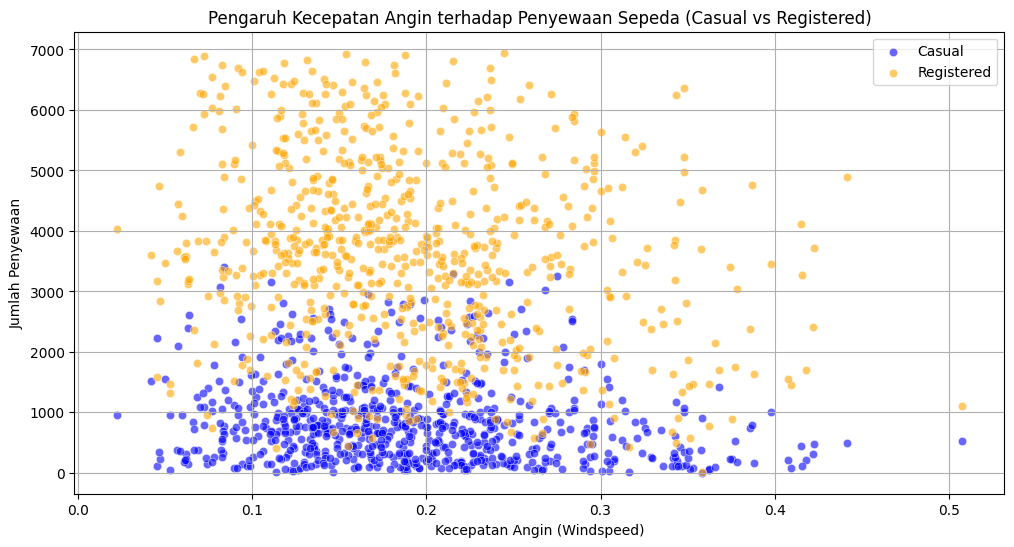

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat scatter plot untuk melihat hubungan antara windspeed dengan jumlah penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.scatterplot(x='windspeed', y='casual', data=data_hari, color='blue', label='Casual', alpha=0.6)
sns.scatterplot(x='windspeed', y='registered', data=data_hari, color='orange', label='Registered', alpha=0.6)

plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda (Casual vs Registered)')
plt.xlabel('Kecepatan Angin (Windspeed)')
plt.ylabel('Jumlah Penyewaan')
plt.legend()
plt.grid(True)
plt.show()

print()
print()
print()





### Pertanyaan 2:

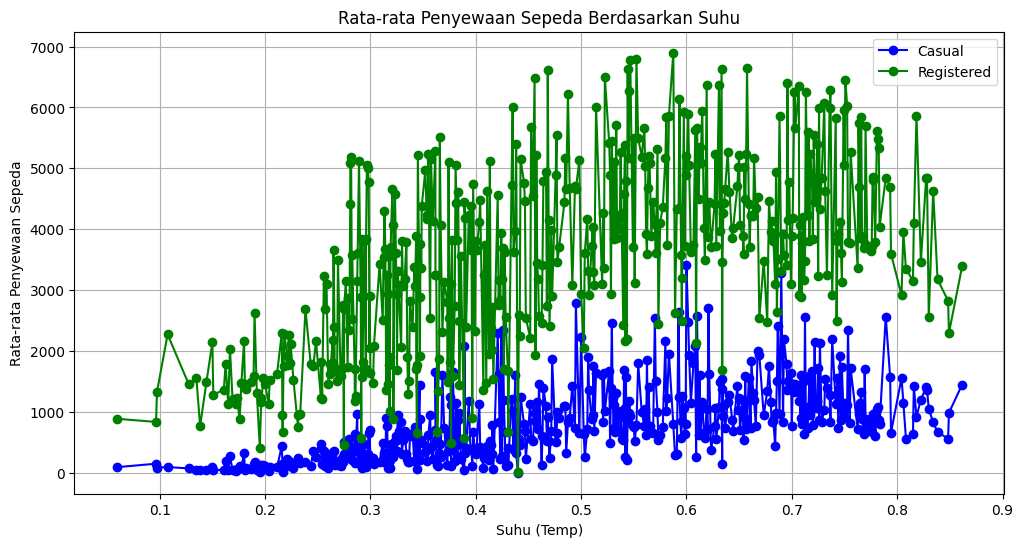

In [29]:
# Menghitung rata-rata penyewaan sepeda berdasarkan suhu
temp_avg = data_hari.groupby('temp')[['casual', 'registered']].mean().reset_index()

# Membuat line plot
plt.figure(figsize=(12, 6))

# Line plot untuk pengguna casual
plt.plot(temp_avg['temp'], temp_avg['casual'], color='blue', label='Casual', marker='o')

# Line plot untuk pengguna registered
plt.plot(temp_avg['temp'], temp_avg['registered'], color='green', label='Registered', marker='o')

# Mengatur label dan judul
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Suhu')
plt.xlabel('Suhu (Temp)')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.legend()
plt.grid()
plt.show()


**Insight:**
* Pada kecepatan angin rendah (0.022392), jumlah penyewaan sepeda oleh pengguna casual mencapai 949 unit, tetapi hanya 120 unit pada kecepatan angin 0.045408.
* Pada suhu yang lebih rendah (misalnya, 0.059130), jumlah penyewaan sepeda oleh pengguna casual hanya 93 unit, sementara pada suhu yang lebih tinggi (misalnya, 0.861667), jumlah penyewaan mencapai 1448 unit



## Analisis Lanjutan (Opsional)

## Conclusion

Berdasarkan analisis data rata-rata penyewaan sepeda, dapat disimpulkan bahwa pengguna casual menunjukkan variasi yang signifikan dalam penyewaan sepeda seiring dengan perubahan kecepatan angin dan suhu. Pada kecepatan angin rendah (0.022392), pengguna casual menyewa 949 unit, tetapi jumlah tersebut menurun drastis menjadi hanya 120 unit pada kecepatan angin yang lebih tinggi (0.045408), menunjukkan bahwa mereka lebih cenderung menyewa sepeda dalam kondisi angin yang tenang. Selain itu, pada suhu yang lebih rendah (0.059130), pengguna casual menyewa hanya 93 unit, sementara pada suhu yang lebih tinggi (0.861667), jumlah penyewaan meningkat tajam menjadi 1448 unit. Ini mengindikasikan bahwa suhu memiliki pengaruh positif terhadap penyewaan sepeda, dan menunjukkan bahwa pengguna casual lebih responsif terhadap kondisi cuaca. Temuan ini menekankan pentingnya mempertimbangkan faktor lingkungan dalam strategi penyewaan sepeda.